In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import requests
import json

In [2]:
with open("india_states.geojson","r") as file:
    geojson_data = json.load(file)

In [3]:
df = pd.read_csv("State Wise Data - Total Enrollments in 2025.csv")
df.head()

,State,Demo_age_5_17,Demo_age_17+
0,Andaman and Nicobar Islands,552.0,6384.0
1,Andhra Pradesh,268725.0,1807214.0
2,Arunachal Pradesh,5336.0,29682.0
3,Assam,75898.0,882050.0
4,Bihar,303124.0,4145868.0


In [4]:
with open('mapping.json', 'r') as f:
    state_mapping = json.load(f)

print("State mapping loaded:")
print(json.dumps(state_mapping, indent=2))

State mapping loaded:
{
  "Andaman and Nicobar Islands": "Andaman & Nicobar",
  "Andhra Pradesh": "Andhra Pradesh",
  "Arunachal Pradesh": "Arunachal Pradesh",
  "Assam": "Assam",
  "Bihar": "Bihar",
  "Chandigarh": "Chandigarh",
  "Chhattisgarh": "Chhattisgarh",
  "Dadra and Nagar Haveli and Daman and Diu": "Dadra and Nagar Haveli and Daman and Diu",
  "Delhi": "Delhi",
  "Goa": "Goa",
  "Gujarat": "Gujarat",
  "Haryana": "Haryana",
  "Himachal Pradesh": "Himachal Pradesh",
  "Jammu and Kashmir": "Jammu & Kashmir",
  "Jharkhand": "Jharkhand",
  "Karnataka": "Karnataka",
  "Kerala": "Kerala",
  "Ladakh": "Ladakh",
  "Lakshadweep": "Lakshadweep",
  "Madhya Pradesh": "Madhya Pradesh",
  "Maharashtra": "Maharashtra",
  "Manipur": "Manipur",
  "Meghalaya": "Meghalaya",
  "Mizoram": "Mizoram",
  "Nagaland": "Nagaland",
  "Odisha": "Odisha",
  "Puducherry": "Puducherry",
  "Punjab": "Punjab",
  "Rajasthan": "Rajasthan",
  "Sikkim": "Sikkim",
  "Tamil Nadu": "Tamil Nadu",
  "Telangana": "Tela

In [5]:
df['state_standardized'] = df['State'].map(state_mapping)

# Check for any unmapped states
unmapped = df[df['state_standardized'].isna()]
if len(unmapped) > 0:
    print("⚠ Warning: These states were not found in mapping:")
    print(unmapped['state'].unique())
else:
    print("✓ All states mapped successfully!")

print("\nDataframe with standardized names:")
df[['State', 'state_standardized']].head(10)

✓ All states mapped successfully!

Dataframe with standardized names:


,State,state_standardized
0,Andaman and Nicobar Islands,Andaman & Nicobar
1,Andhra Pradesh,Andhra Pradesh
2,Arunachal Pradesh,Arunachal Pradesh
3,Assam,Assam
4,Bihar,Bihar
5,Chandigarh,Chandigarh
6,Chhattisgarh,Chhattisgarh
7,Dadra and Nagar Haveli and Daman and Diu,Dadra and Nagar Haveli and Daman and Diu
8,Delhi,Delhi
9,Goa,Goa


In [6]:
india_gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])
india_gdf['state_name'] = india_gdf['ST_NM']

print(f"\nTotal states/territories in GeoJSON: {len(india_gdf)}")
print("\nStates in GeoJSON:")
print(sorted(india_gdf['state_name'].tolist()))


Total states/territories in GeoJSON: 36

States in GeoJSON:
['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [7]:
india_merged = india_gdf.merge(
    df, 
    left_on='state_name', 
    right_on='state_standardized', 
    how='left'
)

print(f"✓ Data merged successfully!")
print(f"\nStates with data: {india_merged['state_standardized'].notna().sum()}")
print(f"States without data: {india_merged['state_standardized'].isna().sum()}")

# Show which states have data
print("\nStates with metric data:")
print(sorted(india_merged[india_merged['state_standardized'].notna()]['state_name'].tolist()))

✓ Data merged successfully!

States with data: 36
States without data: 0

States with metric data:
['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [8]:
def create_india_heatmap(gdf, metric_column, title, output_file, cmap='YlOrRd', figsize=(12, 14)):
    """
    Create and save a heatmap of India
    
    Parameters:
    -----------
    gdf : GeoDataFrame
        Merged geodataframe with metric data
    metric_column : str
        Name of the metric column to visualize
    title : str
        Title for the heatmap
    output_file : str
        Output filename (e.g., 'heatmap1.png')
    cmap : str
        Matplotlib colormap (default: 'YlOrRd')
    figsize : tuple
        Figure size (width, height)
    """
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot the heatmap
    gdf.plot(
        column=metric_column,
        ax=ax,
        legend=True,
        cmap=cmap,
        edgecolor='black',
        linewidth=0.5,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "hatch": "///",
            "label": "No data"
        },
        legend_kwds={
            'label': metric_column.replace('_', ' ').title(),
            'orientation': "vertical",
            'shrink': 0.7
        }
    )
    
    # Styling
    ax.set_title(title, fontsize=18, fontweight='bold', pad=20)
    ax.axis('off')
    
    # Tight layout
    plt.tight_layout()
    
    # Save
    plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✓ Saved: {output_file}")
    
    # Display in notebook
    plt.show()
    
    return fig, ax

print("✓ Heatmap function defined!")

✓ Heatmap function defined!


✓ Saved: india_heatmap_metric1.png


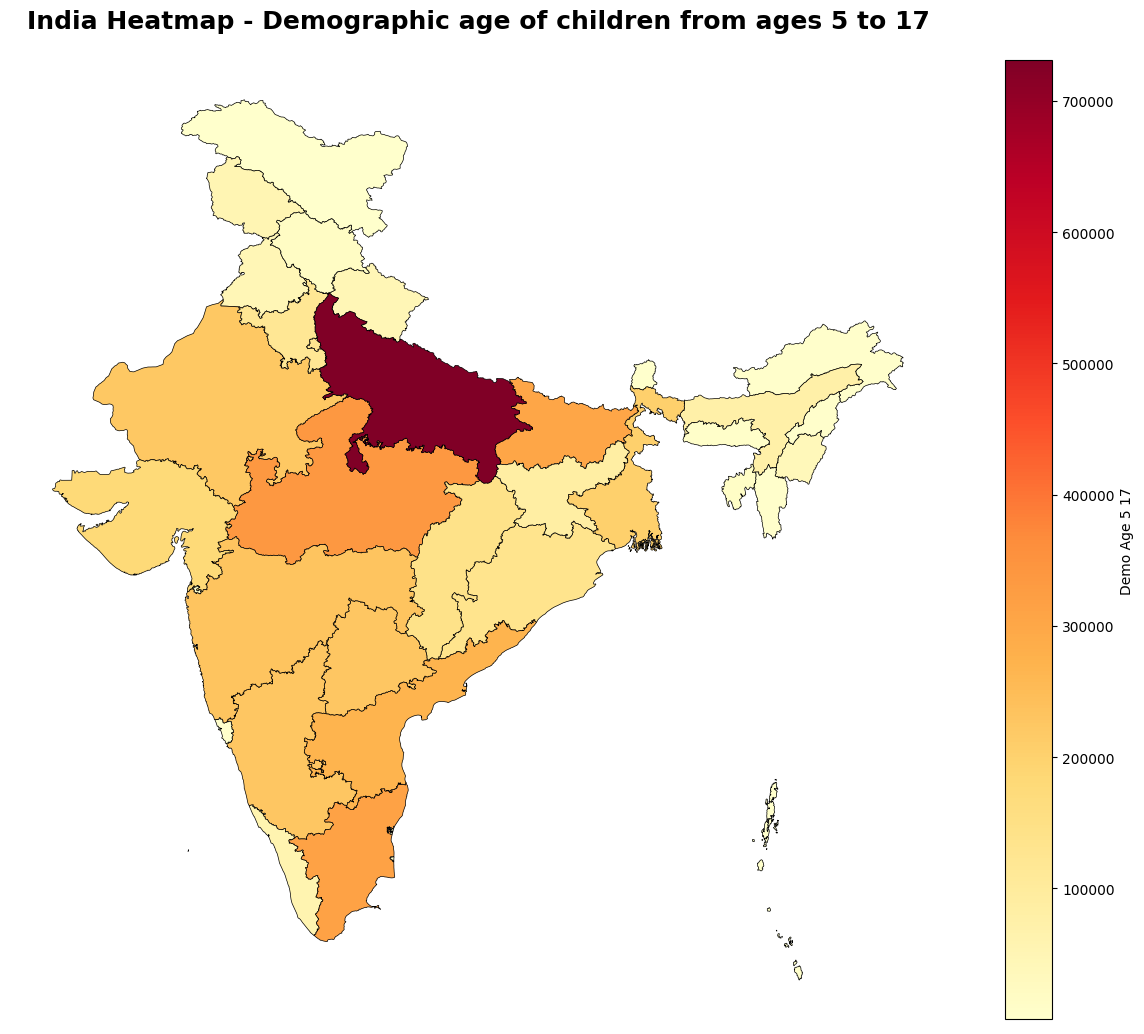

In [9]:
# Configure your first metric
METRIC1_COLUMN = 'Demo_age_5_17'  # Change this to your actual column name
METRIC1_TITLE = 'India Heatmap - Demographic age of children from ages 5 to 17'  # Change this to your desired title
METRIC1_OUTPUT = 'india_heatmap_metric1.png'
METRIC1_COLORMAP = 'YlOrRd'  # Options: 'YlOrRd', 'Blues', 'Greens', 'viridis', 'plasma', 'coolwarm'

# Create heatmap
fig1, ax1 = create_india_heatmap(
    gdf=india_merged,
    metric_column=METRIC1_COLUMN,
    title=METRIC1_TITLE,
    output_file=METRIC1_OUTPUT,
    cmap=METRIC1_COLORMAP,
    figsize=(12, 14)
)

✓ Saved: india_heatmap_metric2.png


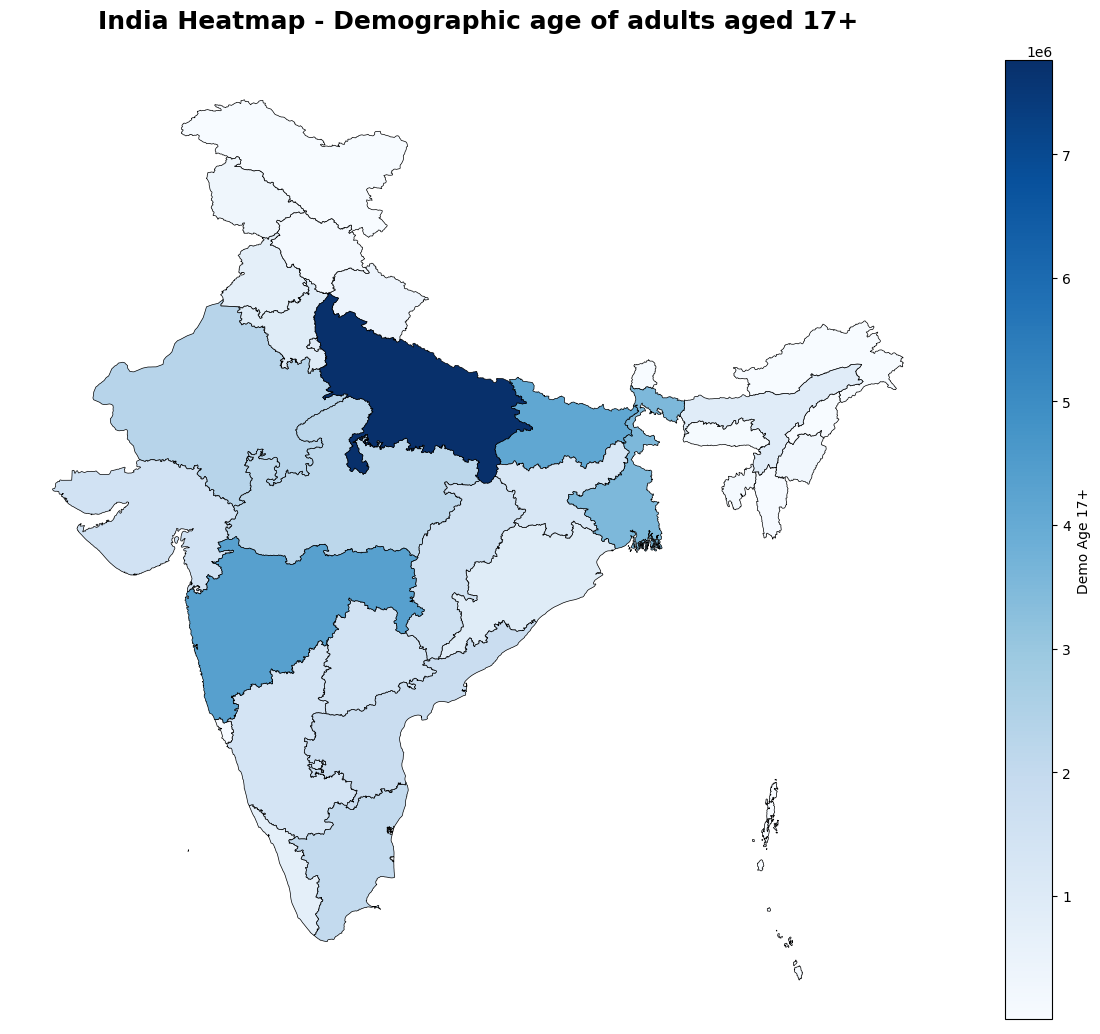

In [10]:
# Configure your second metric
METRIC2_COLUMN = 'Demo_age_17+'  # Change this to your actual column name
METRIC2_TITLE = 'India Heatmap - Demographic age of adults aged 17+'  # Change this to your desired title
METRIC2_OUTPUT = 'india_heatmap_metric2.png'
METRIC2_COLORMAP = 'Blues'  # Options: 'YlOrRd', 'Blues', 'Greens', 'viridis', 'plasma', 'coolwarm'

# Create heatmap
fig2, ax2 = create_india_heatmap(
    gdf=india_merged,
    metric_column=METRIC2_COLUMN,
    title=METRIC2_TITLE,
    output_file=METRIC2_OUTPUT,
    cmap=METRIC2_COLORMAP,
    figsize=(12, 14)
)

✓ Saved: india_heatmap_combined.png


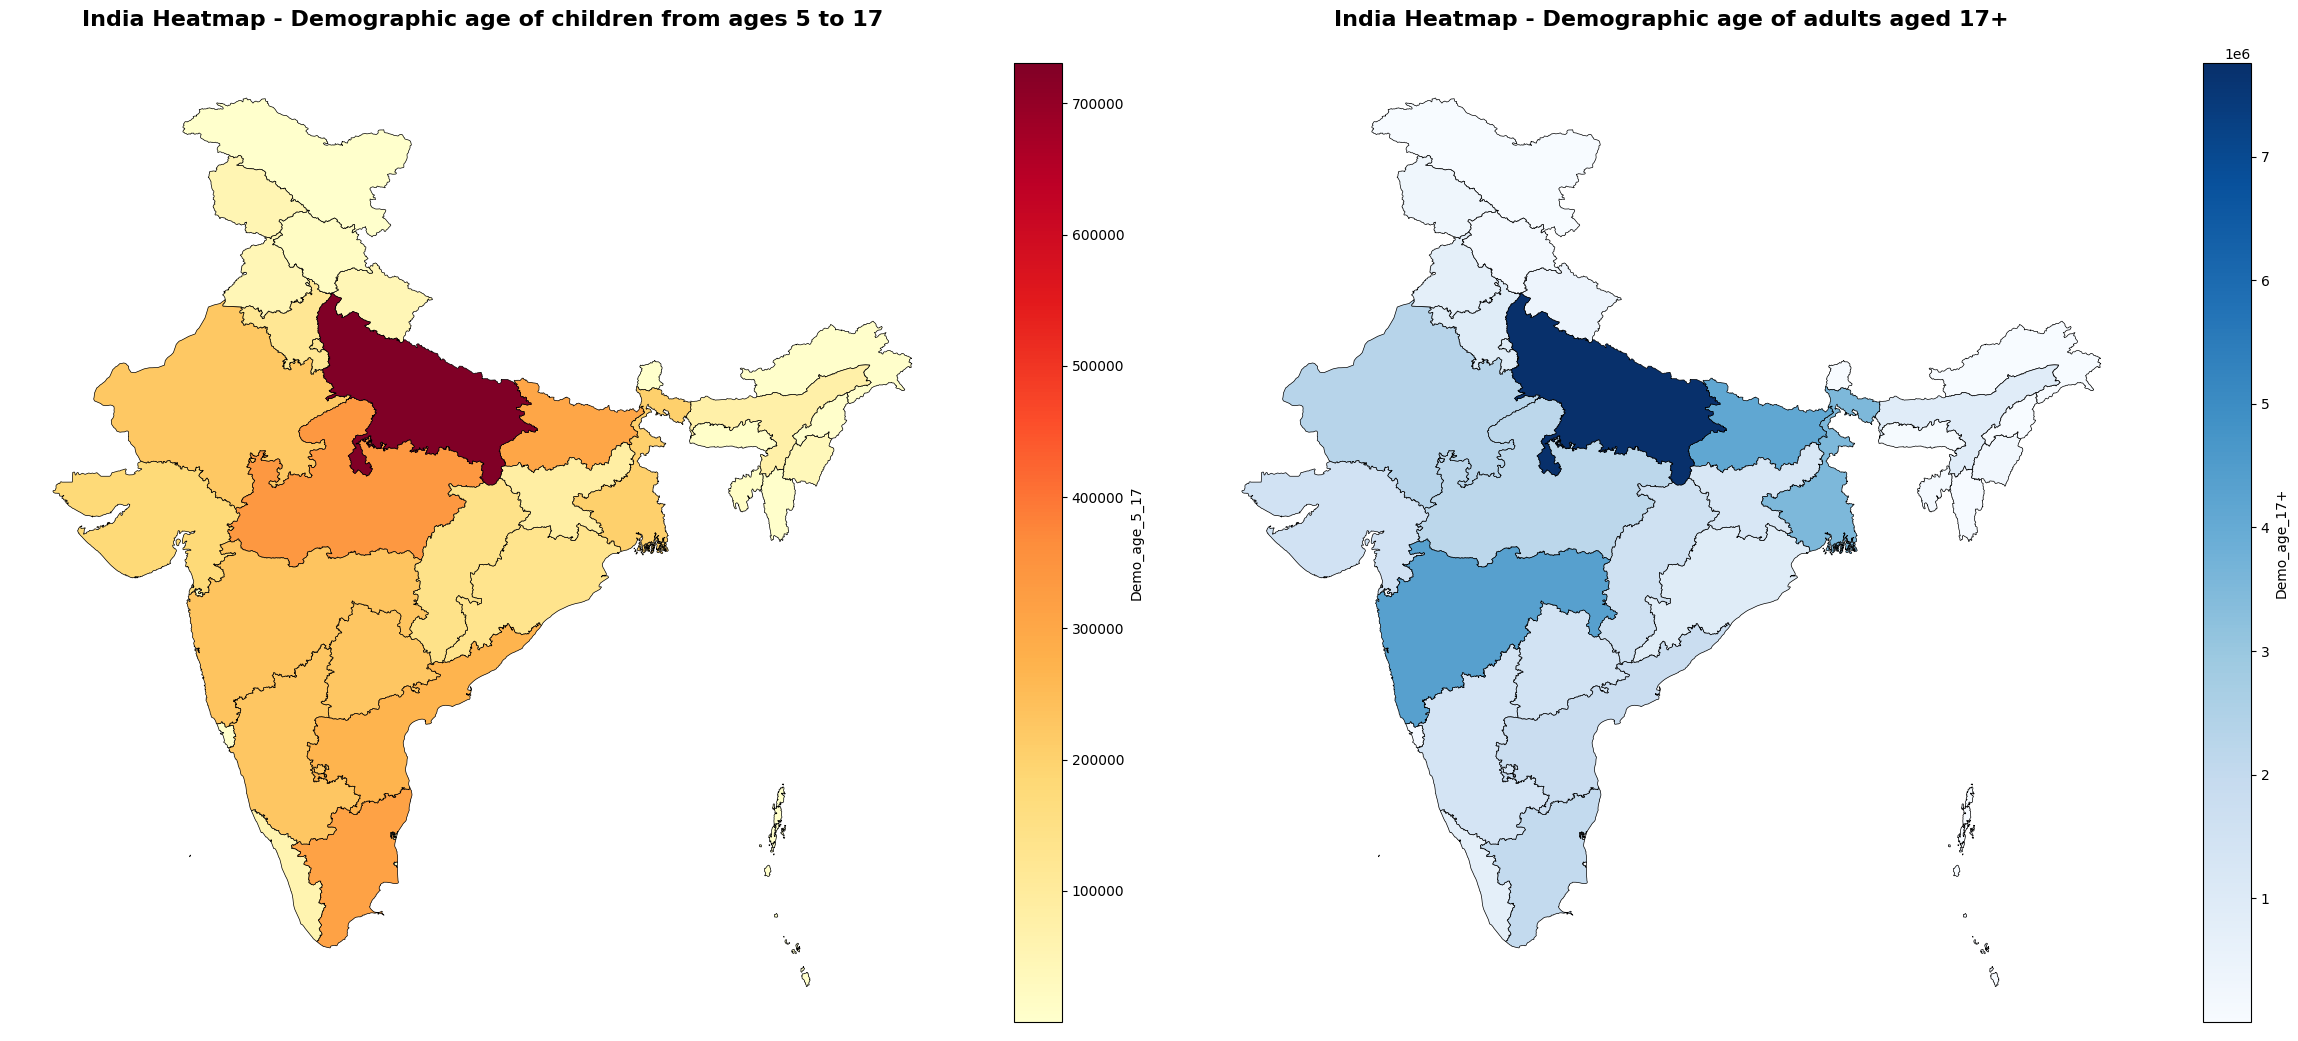

In [11]:
# Create a figure with both heatmaps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 14))

# Plot Metric 1
india_merged.plot(
    column=METRIC1_COLUMN,
    ax=ax1,
    legend=True,
    cmap=METRIC1_COLORMAP,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///"},
    legend_kwds={'label': METRIC1_COLUMN, 'shrink': 0.7}
)
ax1.set_title(METRIC1_TITLE, fontsize=16, fontweight='bold', pad=20)
ax1.axis('off')

# Plot Metric 2
india_merged.plot(
    column=METRIC2_COLUMN,
    ax=ax2,
    legend=True,
    cmap=METRIC2_COLORMAP,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///"},
    legend_kwds={'label': METRIC2_COLUMN, 'shrink': 0.7}
)
ax2.set_title(METRIC2_TITLE, fontsize=16, fontweight='bold', pad=20)
ax2.axis('off')

plt.tight_layout()
plt.savefig('india_heatmap_combined.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: india_heatmap_combined.png")
plt.show()

In [12]:
print("="*60)
print("SUMMARY")
print("="*60)
print(f"\nTotal states in India: {len(india_gdf)}")
print(f"States with data: {df['state_standardized'].notna().sum()}")
print(f"States without data: {len(india_gdf) - df['state_standardized'].notna().sum()}")

print(f"\n{METRIC1_COLUMN} Statistics:")
print(df[METRIC1_COLUMN].describe())

print(f"\n{METRIC2_COLUMN} Statistics:")
print(df[METRIC2_COLUMN].describe())

print("\n" + "="*60)
print("FILES CREATED:")
print("="*60)
print(f"1. {METRIC1_OUTPUT}")
print(f"2. {METRIC2_OUTPUT}")
print(f"3. india_heatmap_combined.png (optional side-by-side)")
print("\n✓ All heatmaps created successfully!")

SUMMARY

Total states in India: 36
States with data: 36
States without data: 0

Demo_age_5_17 Statistics:
count        36.000000
mean     117855.472222
std      149681.948025
min         163.000000
25%        5138.250000
50%       55458.500000
75%      209671.000000
max      730800.000000
Name: Demo_age_5_17, dtype: float64

Demo_age_17+ Statistics:
count    3.600000e+01
mean     1.168864e+06
std      1.625403e+06
min      1.229000e+03
25%      3.368275e+04
50%      7.442065e+05
75%      1.532193e+06
max      7.757888e+06
Name: Demo_age_17+, dtype: float64

FILES CREATED:
1. india_heatmap_metric1.png
2. india_heatmap_metric2.png
3. india_heatmap_combined.png (optional side-by-side)

✓ All heatmaps created successfully!
